In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx

In [2]:
df = pd.read_csv('DataFrame')
X = pd.read_csv('clean_data')

In [3]:
df['Type of Travel'].value_counts(normalize=True)

Business travel    0.689167
Personal Travel    0.310833
Name: Type of Travel, dtype: float64

In [4]:
X.drop(columns=['Unnamed: 0'],inplace=True)
X.Class = X.Class.apply(lambda x: 1 if x == 0 else(2 if x == 1 else 3))
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,69,0,1,964,3,2,3,3,...,2,5,5,3,5,1,5,3,0,0
1,0,0,55,1,3,240,2,5,5,5,...,2,1,1,2,3,2,3,2,163,0
2,1,0,51,1,3,2672,5,5,5,5,...,1,4,4,4,4,5,4,3,0,1
3,0,1,27,1,1,495,2,3,2,2,...,3,3,4,4,3,4,2,3,0,0
4,0,0,12,0,1,462,2,4,2,3,...,2,2,3,4,2,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,49,0,1,1587,3,4,3,4,...,5,4,4,3,5,3,4,5,35,0
5996,1,0,33,0,1,588,2,5,2,3,...,5,5,5,3,5,5,5,5,0,0
5997,0,0,50,0,1,2358,1,4,1,5,...,4,4,4,5,4,4,3,4,0,0
5998,0,0,35,0,1,672,2,3,2,2,...,5,5,1,1,4,4,1,5,0,0


In [5]:
summary = X.describe()

In [6]:
A = np.loadtxt('adjacency_matrix.csv',delimiter=',')

In [7]:
np.diag(A).sum()

0.0

In [8]:
G = nx.from_numpy_matrix(A)

In [9]:
nx.is_connected(G)

True

In [10]:
features = pd.Series(X.satisfaction) 

In [11]:
pos = nx.spring_layout(G)

In [12]:
dissatisfied = df.index[df.satisfaction == 'neutral or dissatisfied'].tolist()
satisfied = df.index[df.satisfaction == 'satisfied'].tolist()

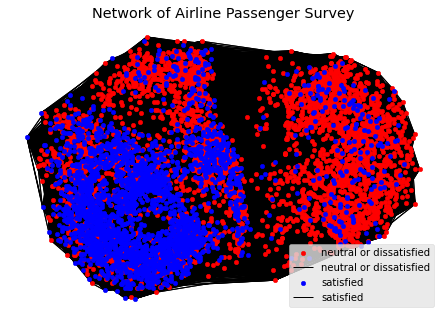

In [13]:
nx.draw(G,pos,nodelist=dissatisfied,node_size=20,node_color='r',label='neutral or dissatisfied')
nx.draw(G,pos,nodelist=satisfied,node_size=20,node_color='b',label='satisfied')
plt.title('Network of Airline Passenger Survey')
plt.legend()
plt.show()

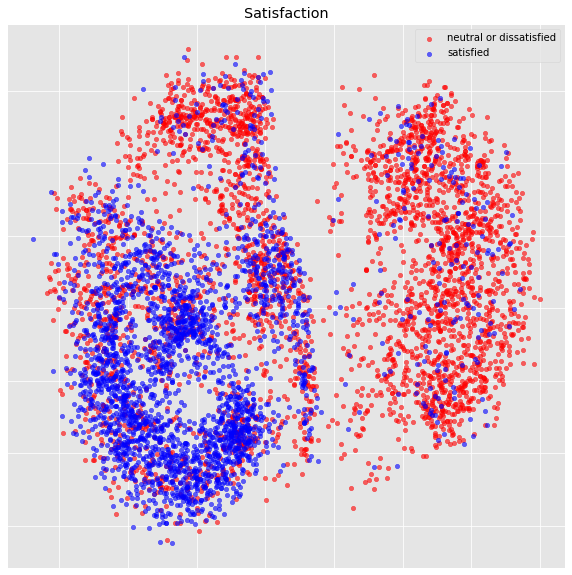

In [14]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,nodelist=dissatisfied,node_size=20,node_color='r', alpha=0.6,label='neutral or dissatisfied')
nx.draw_networkx_nodes(G,pos,nodelist=satisfied,node_size=20,node_color='b', alpha=0.6,label='satisfied')
plt.legend()
plt.title('Satisfaction')
plt.show()

<AxesSubplot:>

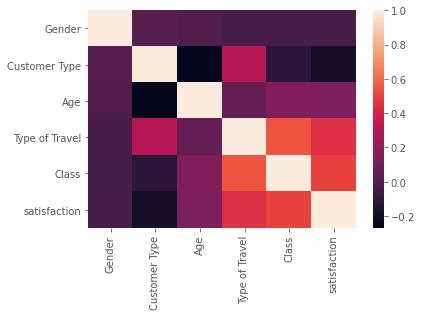

In [15]:
import seaborn as sns
cormap_vars = X[['Gender','Customer Type','Age','Type of Travel','Class','satisfaction']]
cormap = cormap_vars.corr()
sns.heatmap(cormap)

In [16]:
male = df.index[df.Gender == 'Male'].tolist()
female = df.index[df.Gender == 'Female'].tolist()

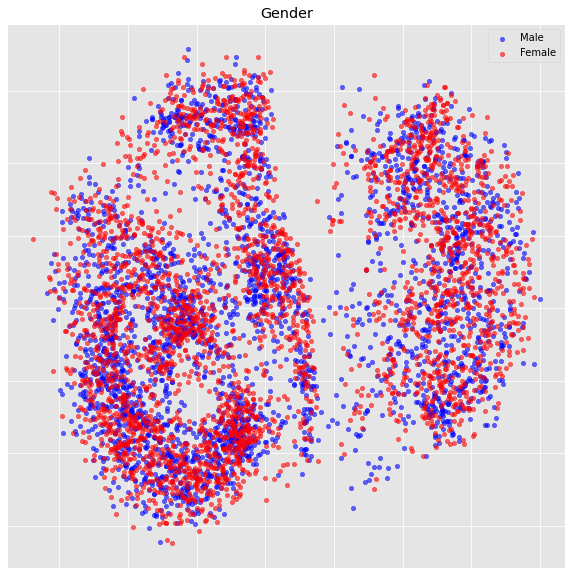

In [17]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,nodelist=male,node_size=20,node_color='b', alpha=0.6,label='Male')
nx.draw_networkx_nodes(G,pos,nodelist=female,node_size=20,node_color='r', alpha=0.6,label='Female')
plt.legend()
plt.title('Gender')
plt.show()

In [18]:
loyal = df.index[df['Customer Type'] == 'Loyal Customer'].tolist()
disloyal = df.index[df['Customer Type'] == 'disloyal Customer'].tolist()

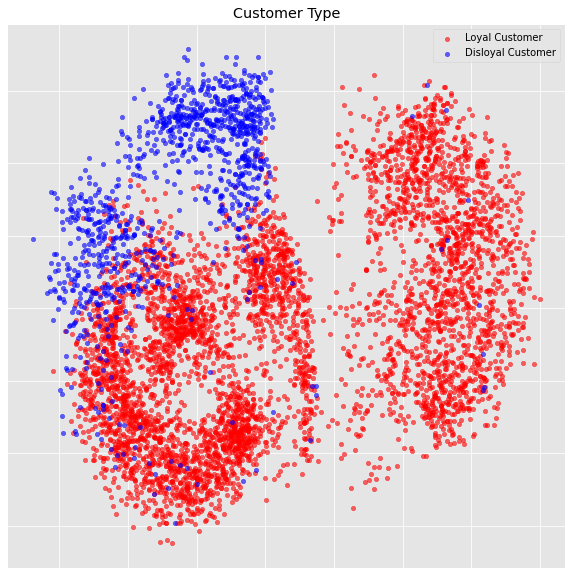

In [19]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,nodelist=loyal,node_size=20,node_color='r', alpha=0.6,label='Loyal Customer')
nx.draw_networkx_nodes(G,pos,nodelist=disloyal,node_size=20,node_color='b', alpha=0.6,label='Disloyal Customer')
plt.legend()
plt.title('Customer Type')
plt.show()

In [20]:
eco = df.index[df.Class == 'Eco'].tolist()
eco_plus = df.index[df.Class == 'Eco Plus'].tolist()
bus = df.index[df.Class == 'Business'].tolist()

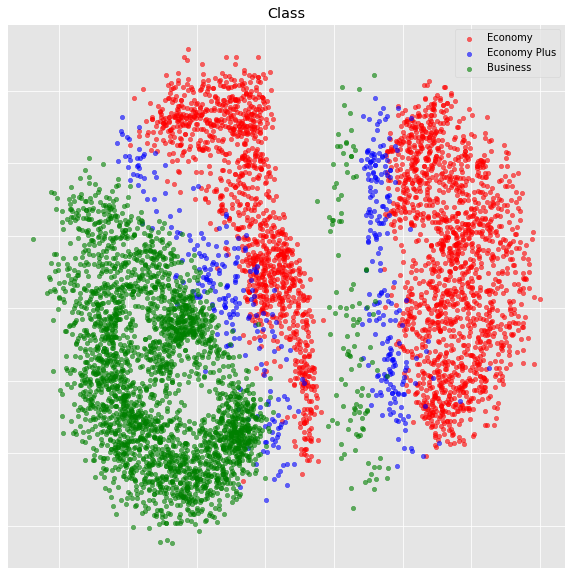

In [21]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,nodelist=eco,node_size=20,node_color='r', alpha=0.6,label='Economy')
nx.draw_networkx_nodes(G,pos,nodelist=eco_plus,node_size=20,node_color='b', alpha=0.6,label='Economy Plus')
nx.draw_networkx_nodes(G,pos,nodelist=bus,node_size=20,node_color='g', alpha=0.6,label='Business')
plt.legend()
plt.title('Class')
plt.show()

In [22]:
personal = df.index[df['Type of Travel'] == 'Personal Travel'].tolist()
business = df.index[df['Type of Travel'] == 'Business travel'].tolist()

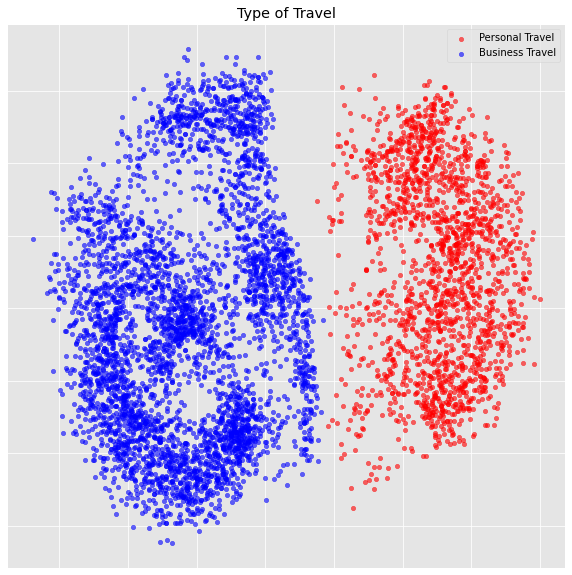

In [23]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,nodelist=personal,node_size=20,node_color='r', alpha=0.6,label='Personal Travel')
nx.draw_networkx_nodes(G,pos,nodelist=business,node_size=20,node_color='b', alpha=0.6,label = 'Business Travel')
plt.legend()
plt.title('Type of Travel')
plt.show()

In [24]:
AGE = df.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))

In [25]:
age0 = AGE.index[AGE == 0].tolist()
age1 = AGE.index[AGE == 1].tolist()
age2 = AGE.index[AGE == 2].tolist()
age3 = AGE.index[AGE == 3].tolist()

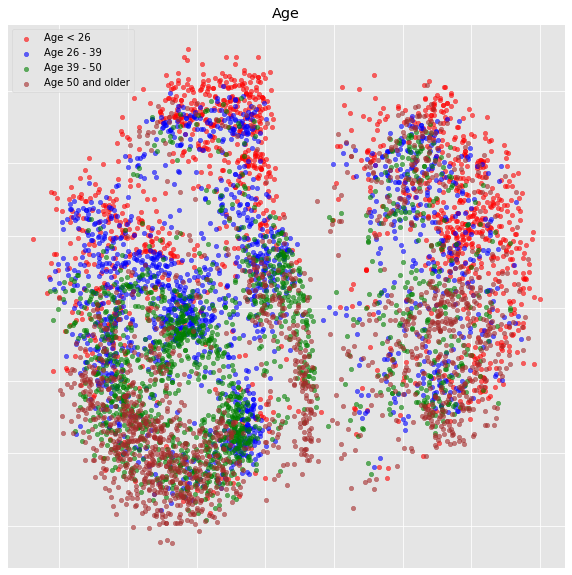

In [26]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,nodelist=age0,node_size=20,node_color='r', alpha=0.6,label = 'Age < 26')
nx.draw_networkx_nodes(G,pos,nodelist=age1,node_size=20,node_color='b', alpha=0.6,label = 'Age 26 - 39')
nx.draw_networkx_nodes(G,pos,nodelist=age2,node_size=20,node_color='g', alpha=0.6,label = 'Age 39 - 50')
nx.draw_networkx_nodes(G,pos,nodelist=age3,node_size=20,node_color='brown', alpha=0.6,label = 'Age 50 and older' )
plt.legend()
plt.title('Age')
plt.show()

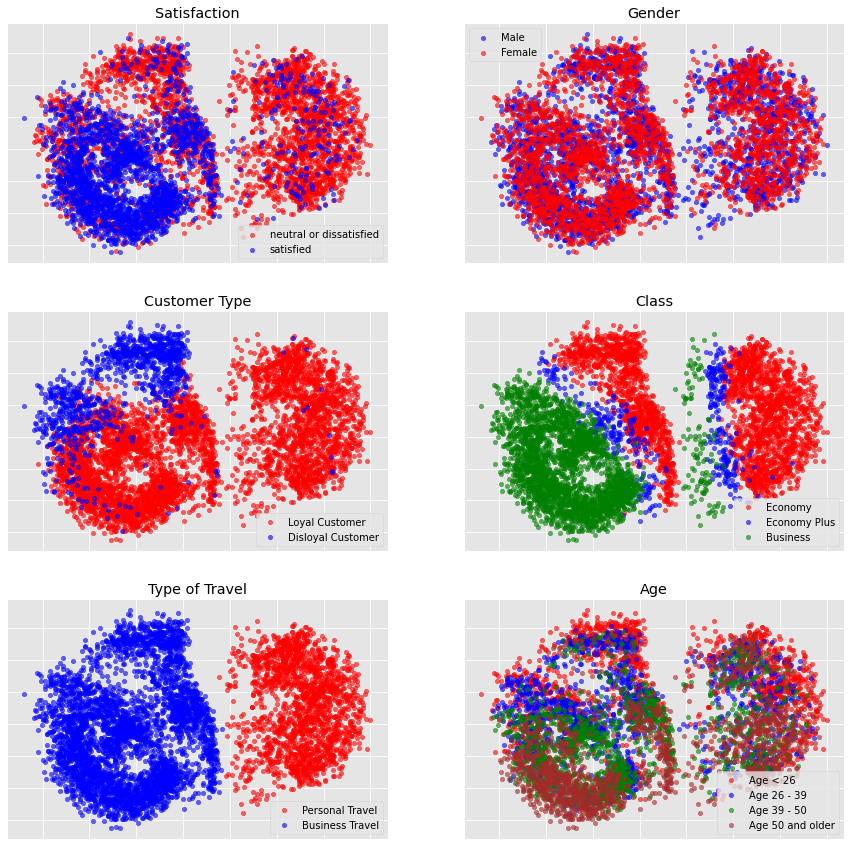

In [27]:
fig = plt.subplots(figsize=(15,15))

plt.subplot(321)
nx.draw_networkx_nodes(G,pos,nodelist=dissatisfied,node_size=20,node_color='r', alpha=0.6,label='neutral or dissatisfied')
nx.draw_networkx_nodes(G,pos,nodelist=satisfied,node_size=20,node_color='b', alpha=0.6,label='satisfied')
plt.title('Satisfaction')
plt.legend()

plt.subplot(322)
nx.draw_networkx_nodes(G,pos,nodelist=male,node_size=20,node_color='b', alpha=0.6,label='Male')
nx.draw_networkx_nodes(G,pos,nodelist=female,node_size=20,node_color='r', alpha=0.6,label='Female')
plt.title('Gender')
plt.legend()

plt.subplot(323)
nx.draw_networkx_nodes(G,pos,nodelist=loyal,node_size=20,node_color='r', alpha=0.6,label='Loyal Customer')
nx.draw_networkx_nodes(G,pos,nodelist=disloyal,node_size=20,node_color='b', alpha=0.6,label='Disloyal Customer')
plt.title('Customer Type')
plt.legend()

plt.subplot(324)
nx.draw_networkx_nodes(G,pos,nodelist=eco,node_size=20,node_color='r', alpha=0.6,label='Economy')
nx.draw_networkx_nodes(G,pos,nodelist=eco_plus,node_size=20,node_color='b', alpha=0.6,label='Economy Plus')
nx.draw_networkx_nodes(G,pos,nodelist=bus,node_size=20,node_color='g', alpha=0.6,label='Business')
plt.title('Class')
plt.legend()

plt.subplot(325)
nx.draw_networkx_nodes(G,pos,nodelist=personal,node_size=20,node_color='r', alpha=0.6,label='Personal Travel')
nx.draw_networkx_nodes(G,pos,nodelist=business,node_size=20,node_color='b', alpha=0.6,label = 'Business Travel')
plt.title('Type of Travel')
plt.legend()

plt.subplot(326)
nx.draw_networkx_nodes(G,pos,nodelist=age0,node_size=20,node_color='r', alpha=0.6,label = 'Age < 26')
nx.draw_networkx_nodes(G,pos,nodelist=age1,node_size=20,node_color='b', alpha=0.6,label = 'Age 26 - 39')
nx.draw_networkx_nodes(G,pos,nodelist=age2,node_size=20,node_color='g', alpha=0.6,label = 'Age 39 - 50')
nx.draw_networkx_nodes(G,pos,nodelist=age3,node_size=20,node_color='brown', alpha=0.6,label = 'Age 50 and older')
plt.title('Age')
plt.legend()

plt.show()


In [28]:
# node2vec
t = pd.read_csv('embeddings', delimiter = " ", index_col=0, header = None)
t.sort_index(inplace=True)
t = t.to_numpy()
t.shape

(6000, 2)

In [29]:
Z = pd.DataFrame(t,columns = ['x1','x2'])
Z['features'] = features

In [30]:
import statsmodels.api as sm
P = sm.add_constant(t) 
log_reg = sm.Logit(features, P).fit()

Optimization terminated successfully.
         Current function value: 0.517356
         Iterations 6


In [31]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5997
Method:                           MLE   Df Model:                            2
Date:                Thu, 17 Jun 2021   Pseudo R-squ.:                  0.2427
Time:                        15:46:37   Log-Likelihood:                -3104.1
converged:                       True   LL-Null:                       -4099.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7051      0.366    -10.135      0.000      -4.422      -2.989
x1             0.9593      0.026     36.244      0.000       0.907       1.011
x2            -3.2333      0.360     -8.992      0.0

In [32]:
predictions = log_reg.predict(P) 

yhat_log = np.empty((len(predictions),1))

for i in range(len(predictions)):
    if predictions[i] < 0.5:
        yhat_log[i] = 0
    else:         
        yhat_log[i] = 1

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Classification Accuracy validation set {}'.format(accuracy_score(features,yhat_log)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(features,yhat_log))

Classification Accuracy validation set 0.7668333333333334
-------------------------------------------------------------
Confusion Matrix validation set:
[[2612  811]
 [ 588 1989]]


In [34]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
#f = pd.get_dummies(X.Class)
x_train, x_test, y_train, y_test = train_test_split(t,f, test_size = 0.2, shuffle=True)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=50, batch_size=10)

Epoch 1/50
480/480 [==============================] - 1s 2ms/step - loss: 0.5932 - accuracy: 0.7209 - val_loss: 0.5079 - val_accuracy: 0.7758
Epoch 2/50
480/480 [==============================] - 1s 1ms/step - loss: 0.5245 - accuracy: 0.7622 - val_loss: 0.5028 - val_accuracy: 0.7775
Epoch 3/50
480/480 [==============================] - 1s 1ms/step - loss: 0.5261 - accuracy: 0.7664 - val_loss: 0.5001 - val_accuracy: 0.7800
Epoch 4/50
480/480 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7551 - val_loss: 0.5008 - val_accuracy: 0.7775
Epoch 5/50
480/480 [==============================] - 1s 1ms/step - loss: 0.5214 - accuracy: 0.7623 - val_loss: 0.5002 - val_accuracy: 0.7767
Epoch 6/50
480/480 [==============================] - 1s 2ms/step - loss: 0.5136 - accuracy: 0.7691 - val_loss: 0.4999 - val_accuracy: 0.7800
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: 0.5088 - accuracy: 0.7724 - val_loss: 0.5008 - val_accuracy: 0.7775
Epoch 

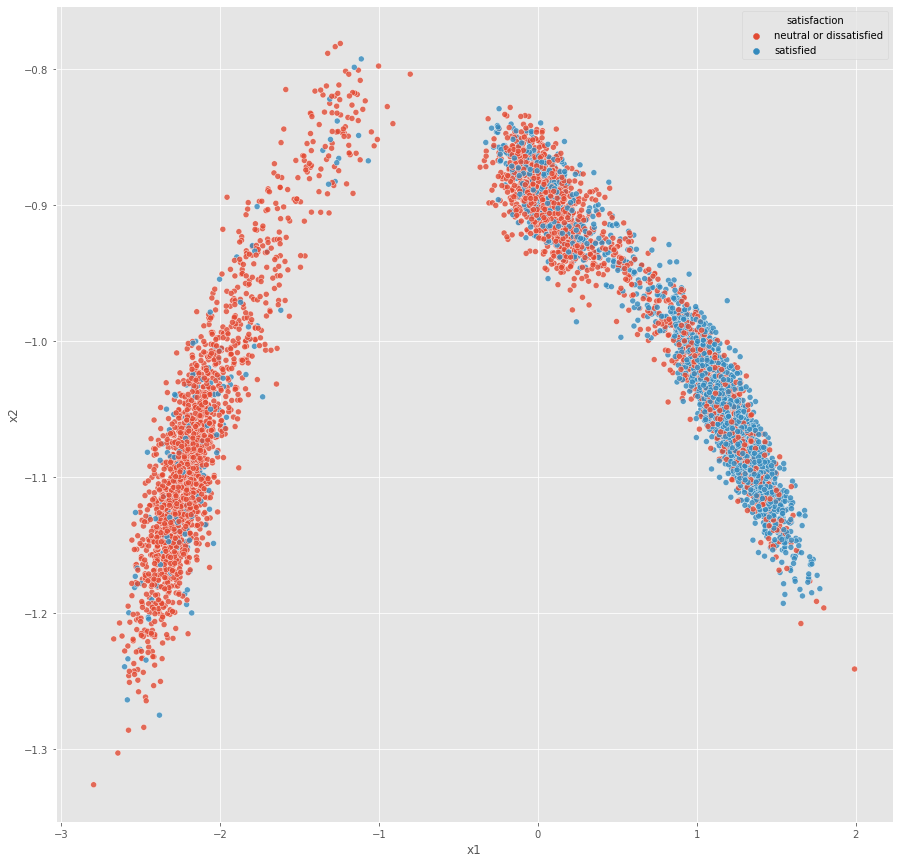

In [37]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['satisfaction'],alpha=0.8)
plt.show()

In [117]:
import dgl
import dgl.nn as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
import sklearn.metrics

G_dgl = dgl.from_networkx(G)
x_var = X.drop(columns=['satisfaction'])
x_wd = pd.get_dummies(data=x_var,columns=['Customer Type','Type of Travel','Gender'])
scale = StandardScaler()
x_wd[['Age','Departure Delay in Minutes','Flight Distance']] = pd.DataFrame(scale.fit_transform(x_wd[['Age','Departure Delay in Minutes','Flight Distance']]))

embedding = nn.Parameter(torch.tensor(x_wd.values,dtype=torch.float)) 

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.8)
G_dgl.ndata['label'] = torch.tensor(features)

In [118]:
x_wd

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Customer Type_0,Customer Type_1,Type of Travel_0,Type of Travel_1,Gender_0,Gender_1
0,1.970713,1,-0.234883,3,2,3,3,4,3,2,...,1,5,3,-0.391953,1,0,1,0,0,1
1,1.047940,3,-0.963364,2,5,5,5,2,2,2,...,2,3,2,3.922296,1,0,0,1,1,0
2,0.784291,3,1.483689,5,5,5,5,3,5,1,...,5,4,3,-0.391953,1,0,0,1,0,1
3,-0.797605,1,-0.706786,2,3,2,2,3,2,3,...,4,2,3,-0.391953,0,1,0,1,1,0
4,-1.786290,1,-0.739990,2,4,2,3,2,2,2,...,2,1,2,-0.391953,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.652466,1,0.391973,3,4,3,4,5,4,5,...,3,4,5,0.534420,1,0,1,0,0,1
5996,-0.402131,1,-0.613210,2,5,2,3,5,2,5,...,5,5,5,-0.391953,1,0,1,0,0,1
5997,0.718379,1,1.167745,1,4,1,5,1,4,4,...,4,3,4,-0.391953,1,0,1,0,1,0
5998,-0.270306,1,-0.528690,2,3,2,2,5,2,5,...,4,1,5,-0.391953,1,0,1,0,1,0


In [119]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [208]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [209]:
train_nodes = (train_mask == True).nonzero(as_tuple=False)
train_nids = torch.reshape(train_nodes,(-1,))
valid_nodes = (valid_mask == True).nonzero(as_tuple=False)
valid_nids = torch.reshape(valid_nodes,(-1,))

In [210]:
len(train_nids)

4771

In [211]:
len(valid_nids)

1229

In [212]:
batch_size = 50
#sampler = dgl.dataloading.MultiLayerNeighborSampler([4, 4, 4])
sampler = dgl.dataloading.MultiLayerNeighborSampler([5, 10])
#sampler = dgl.dataloading.MultiLayerNeighborSampler([None])
train_dataloader = dgl.dataloading.NodeDataLoader(
    G_dgl, train_nids, sampler,
    batch_size=batch_size,
    shuffle=True,
    drop_last=False,
    num_workers=0
)

In [213]:
example_minibatch = next(iter(train_dataloader))
print(example_minibatch)

[tensor([  91, 2842, 5293,  ..., 3255, 3447,  120]), tensor([  91, 2842, 5293,  182, 3594, 3145, 3589,  874, 5531, 2840, 5020, 2535,
        3040, 5715, 5732, 5721, 2549, 3586, 2852, 1016, 3433, 5935, 4536, 1399,
         732, 4550, 1359, 2893, 4561, 1580, 3547, 1835, 5184, 1054, 5493, 5505,
        2920, 2153, 3211, 4237, 5476,  574, 3455, 3593, 5103, 2671, 2898, 3012,
        4549,  665]), [Block(num_src_nodes=2440, num_dst_nodes=529, num_edges=2645), Block(num_src_nodes=529, num_dst_nodes=50, num_edges=500)]]


In [214]:
input_nodes, output_nodes, bipartites = example_minibatch
print("To compute {} nodes' output we need {} nodes' input features".format(len(output_nodes), len(input_nodes)))

To compute 50 nodes' output we need 2440 nodes' input features


In [215]:
print(bipartites)

[Block(num_src_nodes=2440, num_dst_nodes=529, num_edges=2645), Block(num_src_nodes=529, num_dst_nodes=50, num_edges=500)]


In [216]:
batch_size = len(valid_nids)
valid_dataloader = dgl.dataloading.NodeDataLoader(
    G_dgl, valid_nids, sampler,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    num_workers=0
)

In [217]:
def norm(x):
    return F.normalize(x, p=2, dim=-1)

Norm = norm

In [218]:
class SAGE(nn.Module):
    def __init__(self, in_feats, n_hidden, n_classes, n_layers):
        super().__init__()
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.n_classes = n_classes
        self.layers = nn.ModuleList()
        self.layers.append(dglnn.SAGEConv(in_feats, n_hidden, aggregator_type='lstm', bias=True, feat_drop=0.02,norm=Norm,activation=nn.ReLU(inplace=False)))
        for i in range(1, n_layers - 1):
            self.layers.append(dglnn.SAGEConv(n_hidden, n_hidden, aggregator_type='lstm', bias=True, feat_drop=0.02,norm=Norm,activation=nn.ReLU(inplace=False)))
        self.layers.append(dglnn.SAGEConv(n_hidden, n_classes, aggregator_type='lstm', bias=True, feat_drop=0.02,norm=Norm,activation=nn.LogSoftmax(dim=1)))
        
    def forward(self, bipartites, x):
        for l, (layer, bipartite) in enumerate(zip(self.layers, bipartites)):
            x = layer(bipartite, x)
        return x

In [219]:
## Used for sum-pooling
from sage import SAGEConv
class SumSAGE(nn.Module):
    def __init__(self, in_feats, n_hidden, n_classes, n_layers):
        super().__init__()
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.n_classes = n_classes
        self.layers = nn.ModuleList()
        self.layers.append(SAGEConv(in_feats, n_hidden, aggregator_type='pool', bias=True, feat_drop=0.02,norm=Norm,activation=nn.ReLU(inplace=False)))
        for i in range(1, n_layers - 1):
            self.layers.append(SAGEConv(n_hidden, n_hidden, aggregator_type='pool', bias=True, feat_drop=0.02,norm=Norm,activation=nn.ReLU(inplace=False)))
        self.layers.append(SAGEConv(n_hidden, n_classes, aggregator_type='pool', bias=True, feat_drop=0.02,norm=Norm,activation=nn.LogSoftmax(dim=1)))
        
    def forward(self, bipartites, x):
        for l, (layer, bipartite) in enumerate(zip(self.layers, bipartites)):
            x = layer(bipartite, x)
        return x

In [220]:
#model = SumSAGE(n_features, len(x_var.T), n_labels, 2) #n_layers
model = SAGE(n_features, len(x_var.T), n_labels, 2) #n_layers
opt = torch.optim.Adam(model.parameters(),lr=0.002)

In [221]:
import sklearn.metrics

best_accuracy = 0
best_model_path = 'model_preprocc.pt'
epoch_losses_train = []
plot_loss_valid = []
train_acc = []
valid_acc = []
dur = []

for epoch in range(400):
    t0 = time.time()
    model.train()
    loss_epoch = 0
    accuracy_epoch = 0
    for step, (input_nodes, output_nodes, bipartites) in enumerate(train_dataloader):
        inputs = node_features[input_nodes]
        labels = node_labels[output_nodes]
        predictions = model(bipartites, inputs)

        loss = F.cross_entropy(predictions, labels)
        loss_epoch += loss.detach().item()
        opt.zero_grad()
        loss.backward()
        opt.step()

        accuracy = sklearn.metrics.accuracy_score(labels.numpy(), predictions.argmax(1).detach().numpy())
        accuracy_epoch += accuracy
    accuracy_epoch /= (step + 1)
    loss_epoch /= (step + 1)
    epoch_losses_train.append(loss_epoch)
    train_acc.append(accuracy_epoch)
    print('Epoch: {}, Training Accuracy: {:.3f}, Training Loss: {:.3f}'.format(epoch, accuracy_epoch, loss_epoch))
        
    model.eval()
    
    predictions = []
    labels = []
    with torch.no_grad():
        for input_nodes, output_nodes, bipartites in valid_dataloader:
            inputs = node_features[input_nodes]
            labels.append(node_labels[output_nodes].numpy())
            predictions.append(model(bipartites, inputs).argmax(1).numpy())
            valid_pred = model(bipartites, inputs)
            valid_labels = node_labels[output_nodes]
            valid_loss = F.cross_entropy(valid_pred, valid_labels)

        predictions = np.concatenate(predictions)
        labels = np.concatenate(labels)
        
        accuracy = sklearn.metrics.accuracy_score(labels, predictions)
        dur.append(time.time() - t0)
        print('Epoch: {}, Validation Accuracy: {:.3f}, Validation Loss: {:.3f}, Time: {:.4f}'.format(epoch, accuracy, valid_loss.item(), np.mean(dur)))
        #if best_accuracy < accuracy:
        #    best_accuracy = accuracy
        #    torch.save(model.state_dict(), best_model_path)
        valid_acc.append(accuracy.item())
        plot_loss_valid.append(valid_loss.item())
    
torch.save(model.state_dict(), best_model_path)


Epoch: 0, Training Accuracy: 0.682, Training Loss: 0.622
Epoch: 0, Validation Accuracy: 0.834, Validation Loss: 0.500, Time: 4.5925
Epoch: 1, Training Accuracy: 0.827, Training Loss: 0.500
Epoch: 1, Validation Accuracy: 0.875, Validation Loss: 0.462, Time: 5.1147
Epoch: 2, Training Accuracy: 0.854, Training Loss: 0.473
Epoch: 2, Validation Accuracy: 0.877, Validation Loss: 0.450, Time: 5.0901
Epoch: 3, Training Accuracy: 0.864, Training Loss: 0.460
Epoch: 3, Validation Accuracy: 0.884, Validation Loss: 0.439, Time: 5.5580
Epoch: 4, Training Accuracy: 0.871, Training Loss: 0.450
Epoch: 4, Validation Accuracy: 0.890, Validation Loss: 0.430, Time: 5.2931
Epoch: 5, Training Accuracy: 0.882, Training Loss: 0.440
Epoch: 5, Validation Accuracy: 0.893, Validation Loss: 0.424, Time: 5.0119
Epoch: 6, Training Accuracy: 0.885, Training Loss: 0.435
Epoch: 6, Validation Accuracy: 0.898, Validation Loss: 0.421, Time: 4.9092
Epoch: 7, Training Accuracy: 0.892, Training Loss: 0.428
Epoch: 7, Validatio

Epoch: 62, Training Accuracy: 0.929, Training Loss: 0.382
Epoch: 62, Validation Accuracy: 0.939, Validation Loss: 0.377, Time: 4.2182
Epoch: 63, Training Accuracy: 0.938, Training Loss: 0.376
Epoch: 63, Validation Accuracy: 0.940, Validation Loss: 0.374, Time: 4.2078
Epoch: 64, Training Accuracy: 0.936, Training Loss: 0.377
Epoch: 64, Validation Accuracy: 0.941, Validation Loss: 0.373, Time: 4.1972
Epoch: 65, Training Accuracy: 0.938, Training Loss: 0.377
Epoch: 65, Validation Accuracy: 0.941, Validation Loss: 0.374, Time: 4.2023
Epoch: 66, Training Accuracy: 0.941, Training Loss: 0.373
Epoch: 66, Validation Accuracy: 0.937, Validation Loss: 0.379, Time: 4.1992
Epoch: 67, Training Accuracy: 0.937, Training Loss: 0.376
Epoch: 67, Validation Accuracy: 0.933, Validation Loss: 0.379, Time: 4.1901
Epoch: 68, Training Accuracy: 0.942, Training Loss: 0.373
Epoch: 68, Validation Accuracy: 0.933, Validation Loss: 0.379, Time: 4.1799
Epoch: 69, Training Accuracy: 0.938, Training Loss: 0.375
Epoc

Epoch: 123, Training Accuracy: 0.948, Training Loss: 0.366
Epoch: 123, Validation Accuracy: 0.943, Validation Loss: 0.366, Time: 4.2671
Epoch: 124, Training Accuracy: 0.949, Training Loss: 0.365
Epoch: 124, Validation Accuracy: 0.942, Validation Loss: 0.368, Time: 4.2674
Epoch: 125, Training Accuracy: 0.948, Training Loss: 0.365
Epoch: 125, Validation Accuracy: 0.940, Validation Loss: 0.368, Time: 4.2684
Epoch: 126, Training Accuracy: 0.953, Training Loss: 0.360
Epoch: 126, Validation Accuracy: 0.946, Validation Loss: 0.364, Time: 4.2685
Epoch: 127, Training Accuracy: 0.945, Training Loss: 0.368
Epoch: 127, Validation Accuracy: 0.949, Validation Loss: 0.363, Time: 4.2699
Epoch: 128, Training Accuracy: 0.946, Training Loss: 0.366
Epoch: 128, Validation Accuracy: 0.940, Validation Loss: 0.370, Time: 4.2755
Epoch: 129, Training Accuracy: 0.943, Training Loss: 0.372
Epoch: 129, Validation Accuracy: 0.936, Validation Loss: 0.375, Time: 4.2818
Epoch: 130, Training Accuracy: 0.950, Training L

Epoch: 183, Validation Accuracy: 0.945, Validation Loss: 0.365, Time: 4.3301
Epoch: 184, Training Accuracy: 0.952, Training Loss: 0.362
Epoch: 184, Validation Accuracy: 0.950, Validation Loss: 0.361, Time: 4.3370
Epoch: 185, Training Accuracy: 0.950, Training Loss: 0.363
Epoch: 185, Validation Accuracy: 0.949, Validation Loss: 0.363, Time: 4.3344
Epoch: 186, Training Accuracy: 0.949, Training Loss: 0.364
Epoch: 186, Validation Accuracy: 0.941, Validation Loss: 0.368, Time: 4.3293
Epoch: 187, Training Accuracy: 0.953, Training Loss: 0.361
Epoch: 187, Validation Accuracy: 0.948, Validation Loss: 0.365, Time: 4.3362
Epoch: 188, Training Accuracy: 0.951, Training Loss: 0.362
Epoch: 188, Validation Accuracy: 0.947, Validation Loss: 0.367, Time: 4.3363
Epoch: 189, Training Accuracy: 0.948, Training Loss: 0.364
Epoch: 189, Validation Accuracy: 0.945, Validation Loss: 0.365, Time: 4.3319
Epoch: 190, Training Accuracy: 0.953, Training Loss: 0.361
Epoch: 190, Validation Accuracy: 0.943, Validati

Epoch: 244, Training Accuracy: 0.953, Training Loss: 0.360
Epoch: 244, Validation Accuracy: 0.945, Validation Loss: 0.366, Time: 4.0602
Epoch: 245, Training Accuracy: 0.949, Training Loss: 0.363
Epoch: 245, Validation Accuracy: 0.945, Validation Loss: 0.369, Time: 4.0632
Epoch: 246, Training Accuracy: 0.953, Training Loss: 0.360
Epoch: 246, Validation Accuracy: 0.950, Validation Loss: 0.362, Time: 4.0581
Epoch: 247, Training Accuracy: 0.958, Training Loss: 0.356
Epoch: 247, Validation Accuracy: 0.938, Validation Loss: 0.372, Time: 4.0559
Epoch: 248, Training Accuracy: 0.952, Training Loss: 0.360
Epoch: 248, Validation Accuracy: 0.953, Validation Loss: 0.361, Time: 4.0540
Epoch: 249, Training Accuracy: 0.952, Training Loss: 0.361
Epoch: 249, Validation Accuracy: 0.954, Validation Loss: 0.359, Time: 4.0581
Epoch: 250, Training Accuracy: 0.956, Training Loss: 0.355
Epoch: 250, Validation Accuracy: 0.950, Validation Loss: 0.361, Time: 4.0720
Epoch: 251, Training Accuracy: 0.951, Training L

Epoch: 304, Validation Accuracy: 0.941, Validation Loss: 0.369, Time: 4.0835
Epoch: 305, Training Accuracy: 0.954, Training Loss: 0.357
Epoch: 305, Validation Accuracy: 0.942, Validation Loss: 0.369, Time: 4.0922
Epoch: 306, Training Accuracy: 0.958, Training Loss: 0.356
Epoch: 306, Validation Accuracy: 0.951, Validation Loss: 0.363, Time: 4.0941
Epoch: 307, Training Accuracy: 0.954, Training Loss: 0.359
Epoch: 307, Validation Accuracy: 0.948, Validation Loss: 0.365, Time: 4.0927
Epoch: 308, Training Accuracy: 0.957, Training Loss: 0.356
Epoch: 308, Validation Accuracy: 0.945, Validation Loss: 0.365, Time: 4.0974
Epoch: 309, Training Accuracy: 0.956, Training Loss: 0.357
Epoch: 309, Validation Accuracy: 0.937, Validation Loss: 0.373, Time: 4.0952
Epoch: 310, Training Accuracy: 0.951, Training Loss: 0.363
Epoch: 310, Validation Accuracy: 0.946, Validation Loss: 0.366, Time: 4.0967
Epoch: 311, Training Accuracy: 0.951, Training Loss: 0.361
Epoch: 311, Validation Accuracy: 0.941, Validati

Epoch: 365, Training Accuracy: 0.959, Training Loss: 0.354
Epoch: 365, Validation Accuracy: 0.947, Validation Loss: 0.364, Time: 3.9947
Epoch: 366, Training Accuracy: 0.952, Training Loss: 0.360
Epoch: 366, Validation Accuracy: 0.936, Validation Loss: 0.376, Time: 3.9930
Epoch: 367, Training Accuracy: 0.953, Training Loss: 0.358
Epoch: 367, Validation Accuracy: 0.940, Validation Loss: 0.370, Time: 3.9926
Epoch: 368, Training Accuracy: 0.954, Training Loss: 0.357
Epoch: 368, Validation Accuracy: 0.945, Validation Loss: 0.367, Time: 3.9956
Epoch: 369, Training Accuracy: 0.955, Training Loss: 0.357
Epoch: 369, Validation Accuracy: 0.947, Validation Loss: 0.367, Time: 4.0003
Epoch: 370, Training Accuracy: 0.956, Training Loss: 0.356
Epoch: 370, Validation Accuracy: 0.945, Validation Loss: 0.367, Time: 3.9972
Epoch: 371, Training Accuracy: 0.959, Training Loss: 0.354
Epoch: 371, Validation Accuracy: 0.946, Validation Loss: 0.365, Time: 3.9940
Epoch: 372, Training Accuracy: 0.950, Training L

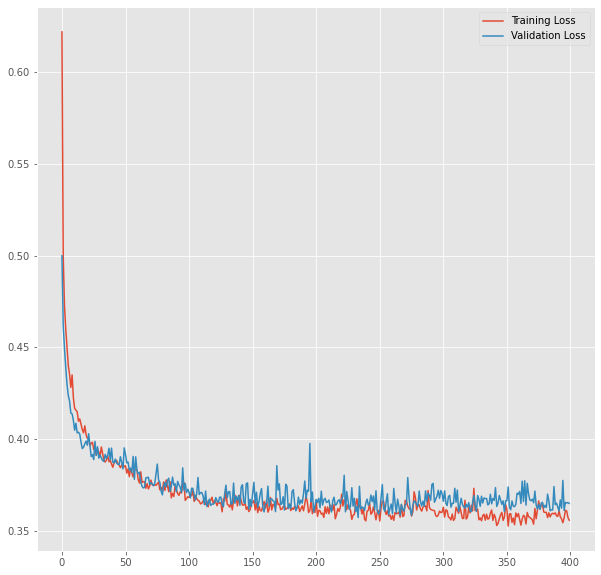

In [222]:
plt.figure(figsize=(10,10))
plt.plot(epoch_losses_train, label='Training Loss')
plt.plot(plot_loss_valid, label='Validation Loss')
plt.legend()
plt.show()

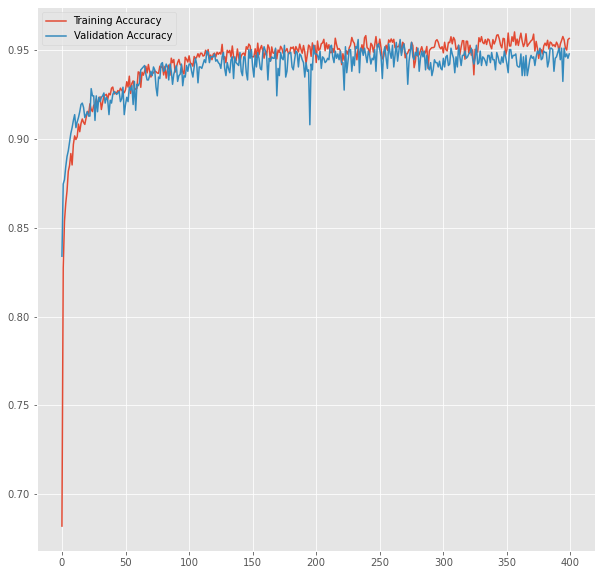

In [223]:
plt.figure(figsize=(10,10))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(valid_acc, label='Validation Accuracy')
plt.legend()
plt.show()

In [224]:
print('Training Accuracy: {}'.format(train_acc[-1]))
print('Validation Accuracy: {}'.format(valid_acc[-1]))

Training Accuracy: 0.9566666666666664
Validation Accuracy: 0.9479251423921887


In [225]:
np.argmax(valid_acc)

233

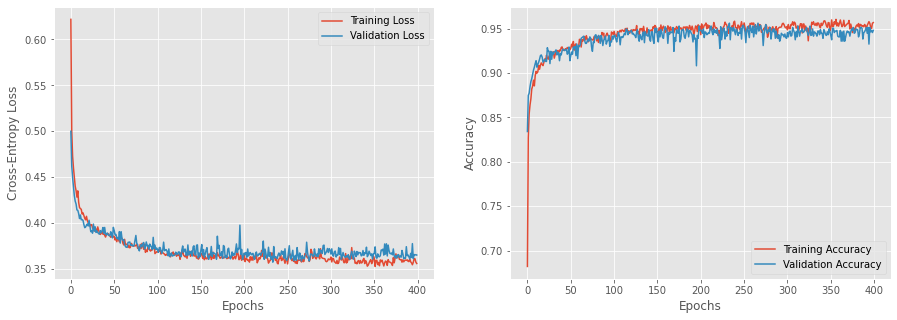

In [226]:
fig = plt.subplots(figsize=(15,5))

plt.subplot(121)
plt.plot(epoch_losses_train, label='Training Loss')
plt.plot(plot_loss_valid, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(122)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(valid_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [227]:
model.parameters

<bound method Module.parameters of SAGE(
  (layers): ModuleList(
    (0): SAGEConv(
      (feat_drop): Dropout(p=0.02, inplace=False)
      (activation): ReLU()
      (lstm): LSTM(24, 24, batch_first=True)
      (fc_self): Linear(in_features=24, out_features=21, bias=False)
      (fc_neigh): Linear(in_features=24, out_features=21, bias=False)
    )
    (1): SAGEConv(
      (feat_drop): Dropout(p=0.02, inplace=False)
      (activation): LogSoftmax(dim=1)
      (lstm): LSTM(21, 21, batch_first=True)
      (fc_self): Linear(in_features=21, out_features=2, bias=False)
      (fc_neigh): Linear(in_features=21, out_features=2, bias=False)
    )
  )
)>

In [61]:
df_test = pd.read_csv('test.csv',sep=',')
df_test = df_test.sample(n=6000)
df_test.drop(columns=['Unnamed: 0','id'],inplace=True)
df_test.Gender = df_test.Gender.apply(lambda x: 0 if x == 'Male' else 1)
df_test['Customer Type'] = df_test['Customer Type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)
df_test['Type of Travel'] = df_test['Type of Travel'].apply(lambda x: 0 if x == 'Personal Travel' else 1)
df_test['Class'] = df_test['Class'].apply(lambda x: 0 if x == 'Eco' else(1 if x == 'Eco Plus' else 2))
df_test['satisfaction'] = df_test['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)
df_test.reset_index(drop=True,inplace=True)
df_test.drop(columns=['Arrival Delay in Minutes'],inplace = True)

In [62]:
TEST = df_test.copy(deep=True)

In [63]:
test_gen = TEST[['Gender','Customer Type','Age','Type of Travel','Class']].copy(deep=True)
test_gen.Age = test_gen.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))

In [64]:
TEST.Class = TEST.Class.apply(lambda x: 1 if x == 0 else(2 if x == 1 else 3))

In [65]:
# gender
gend_alpha0 = 0.60
gend_beta1 = 0.40

aff_gend = np.array([[gend_alpha0,gend_beta1],
                     [gend_beta1,gend_alpha0]])

# customer type (loyal vs disoyal)

type_alpha0 = 0.8
type_beta1 = 0.5

aff_type = np.array([[type_alpha0, type_beta1],
                     [type_beta1, type_alpha0]])


# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta3,age_beta2,age_beta1,age_alpha0]])


# Type of travel
trav_type_alpha0 = 0.80
trav_type_beta1 = 0.20

aff_trav_type = np.array([[trav_type_alpha0, trav_type_beta1],
                          [trav_type_beta1, trav_type_alpha0]])

# Class

class_alpha0 = 0.85
class_beta1 = 0.60
class_beta2 = 0.40

aff_class = np.array([[class_alpha0, class_beta1, class_beta2],
                      [class_beta1, class_alpha0, class_beta1],
                      [class_beta2, class_beta1, class_alpha0]])


aff = {0:aff_gend, 1:aff_type, 2:aff_age, 3:aff_trav_type, 4:aff_class}

In [66]:
x = test_gen.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v)

In [67]:
A = np.triu(P_u_v,1)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0

In [68]:
A = A + A.T

In [69]:
G_test = nx.from_numpy_matrix(A)

In [70]:
test_features = pd.Series(TEST.satisfaction)

In [228]:
G_dgl_test = dgl.from_networkx(G_test)
feat_test = TEST.drop(columns=['satisfaction'])
feat_test = pd.get_dummies(data=feat_test,columns=['Customer Type','Type of Travel','Gender'])
scale = StandardScaler()
feat_test[['Age','Departure Delay in Minutes','Flight Distance']] = pd.DataFrame(scale.fit_transform(feat_test[['Age','Departure Delay in Minutes','Flight Distance']]))

embedding_test = nn.Parameter(torch.tensor(feat_test.values,dtype=torch.float))
G_dgl_test.ndata['feat'] =  embedding_test
G_dgl_test.ndata['label'] = torch.tensor(test_features)

In [229]:
node_features = G_dgl_test.ndata['feat']
node_labels = G_dgl_test.ndata['label']
test_nids = G_dgl_test.nodes()
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [230]:
import tqdm

def inference(model, graph, input_features, batch_size):
    nodes = torch.arange(graph.number_of_nodes())
    
    sampler = dgl.dataloading.MultiLayerNeighborSampler([5,10]) 
    dataloader = dgl.dataloading.NodeDataLoader(
        graph, nodes, sampler,
        batch_size=batch_size,
        shuffle=False,
        drop_last=False,
        num_workers=0)
    
    with torch.no_grad():
        for l, layer in enumerate(model.layers):
            output_features = torch.zeros(
                graph.number_of_nodes(), model.n_hidden if l != model.n_layers - 1 else model.n_classes)

            for input_nodes, output_nodes, bipartites in tqdm.tqdm(dataloader):
                bipartite = bipartites[0]
                x = input_features[input_nodes]
                x = layer(bipartite, x)
                output_features[output_nodes] = x
            input_features = output_features
    return output_features

In [231]:
model.load_state_dict(torch.load('model_preprocc.pt'))
all_predictions = inference(model, G_dgl_test, node_features, 6000)

100%|██████████| 1/1 [00:00<00:00,  6.34it/s]


In [232]:
test_predictions = all_predictions[test_nids].argmax(1)
test_labels = node_labels[test_nids]
test_accuracy = sklearn.metrics.accuracy_score(test_predictions.numpy(), test_labels.numpy())
print('Test accuracy:', test_accuracy)

Test accuracy: 0.9421666666666667


In [233]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Classification Accuracy test set {}'.format(accuracy_score(test_labels.numpy(),test_predictions.numpy())))
print('-------------------------------------------------------------')
print('Confusion Matrix test set:')
print(confusion_matrix(test_labels.numpy(),test_predictions.numpy()))

Classification Accuracy test set 0.9421666666666667
-------------------------------------------------------------
Confusion Matrix test set:
[[3276   81]
 [ 266 2377]]


In [146]:
sklearn.metrics.f1_score(test_labels.numpy(),test_predictions.numpy(),average='micro')

0.9408333333333333

In [78]:
xx = TEST.drop(columns=['satisfaction'])
xx_dummy = pd.get_dummies(data=xx,columns=['Customer Type','Type of Travel','Gender'])
scale = StandardScaler()
xx_dummy[['Age','Departure Delay in Minutes','Flight Distance']] = pd.DataFrame(scale.fit_transform(xx_dummy[['Age','Departure Delay in Minutes','Flight Distance']]))
yy = TEST.satisfaction

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split

f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(x_wd,f, test_size = 0.2, shuffle=True)

x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#model.add(Dropout(0.1))
opt = tf.keras.optimizers.Adam(learning_rate=5e-4)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=250, batch_size=10)

Epoch 1/250
480/480 [==============================] - 2s 3ms/step - loss: 0.7746 - accuracy: 0.5736 - val_loss: 0.5632 - val_accuracy: 0.7492
Epoch 2/250
480/480 [==============================] - 1s 2ms/step - loss: 0.5390 - accuracy: 0.7583 - val_loss: 0.4899 - val_accuracy: 0.8033
Epoch 3/250
480/480 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.8143 - val_loss: 0.4508 - val_accuracy: 0.8258
Epoch 4/250
480/480 [==============================] - 1s 2ms/step - loss: 0.4430 - accuracy: 0.8185 - val_loss: 0.4398 - val_accuracy: 0.8317
Epoch 5/250
480/480 [==============================] - 1s 2ms/step - loss: 0.4055 - accuracy: 0.8456 - val_loss: 0.4113 - val_accuracy: 0.8550
Epoch 6/250
480/480 [==============================] - 1s 2ms/step - loss: 0.3905 - accuracy: 0.8518 - val_loss: 0.3933 - val_accuracy: 0.8592
Epoch 7/250
480/480 [==============================] - 1s 2ms/step - loss: 0.3716 - accuracy: 0.8603 - val_loss: 0.3820 - val_accuracy: 0.8642

Epoch 58/250
480/480 [==============================] - 2s 4ms/step - loss: 0.1768 - accuracy: 0.9297 - val_loss: 0.1892 - val_accuracy: 0.9167
Epoch 59/250
480/480 [==============================] - 1s 2ms/step - loss: 0.1856 - accuracy: 0.9261 - val_loss: 0.1886 - val_accuracy: 0.9150
Epoch 60/250
480/480 [==============================] - 1s 2ms/step - loss: 0.1749 - accuracy: 0.9350 - val_loss: 0.1840 - val_accuracy: 0.9267
Epoch 61/250
480/480 [==============================] - 1s 3ms/step - loss: 0.1744 - accuracy: 0.9319 - val_loss: 0.1839 - val_accuracy: 0.9242
Epoch 62/250
480/480 [==============================] - 1s 3ms/step - loss: 0.1719 - accuracy: 0.9326 - val_loss: 0.1833 - val_accuracy: 0.9192
Epoch 63/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1775 - accuracy: 0.9294 - val_loss: 0.1832 - val_accuracy: 0.9208
Epoch 64/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1662 - accuracy: 0.9348 - val_loss: 0.1810 - val_accuracy:

Epoch 115/250
480/480 [==============================] - 1s 2ms/step - loss: 0.1419 - accuracy: 0.9412 - val_loss: 0.1678 - val_accuracy: 0.9292
Epoch 116/250
480/480 [==============================] - 1s 2ms/step - loss: 0.1452 - accuracy: 0.9453 - val_loss: 0.1676 - val_accuracy: 0.9333
Epoch 117/250
480/480 [==============================] - 1s 2ms/step - loss: 0.1538 - accuracy: 0.9368 - val_loss: 0.1662 - val_accuracy: 0.9333
Epoch 118/250
480/480 [==============================] - 1s 2ms/step - loss: 0.1501 - accuracy: 0.9438 - val_loss: 0.1662 - val_accuracy: 0.9358
Epoch 119/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1456 - accuracy: 0.9402 - val_loss: 0.1735 - val_accuracy: 0.9350
Epoch 120/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1428 - accuracy: 0.9446 - val_loss: 0.1686 - val_accuracy: 0.9367
Epoch 121/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1459 - accuracy: 0.9391 - val_loss: 0.1668 - val_ac

480/480 [==============================] - 1s 2ms/step - loss: 0.1336 - accuracy: 0.9492 - val_loss: 0.1787 - val_accuracy: 0.9233
Epoch 172/250
480/480 [==============================] - 1s 2ms/step - loss: 0.1352 - accuracy: 0.9507 - val_loss: 0.1679 - val_accuracy: 0.9350
Epoch 173/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1388 - accuracy: 0.9446 - val_loss: 0.1668 - val_accuracy: 0.9333
Epoch 174/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1449 - accuracy: 0.9416 - val_loss: 0.1664 - val_accuracy: 0.9342
Epoch 175/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1308 - accuracy: 0.9514 - val_loss: 0.1692 - val_accuracy: 0.9300
Epoch 176/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1389 - accuracy: 0.9434 - val_loss: 0.1650 - val_accuracy: 0.9358
Epoch 177/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1304 - accuracy: 0.9517 - val_loss: 0.1788 - val_accuracy: 0.9233

480/480 [==============================] - 2s 3ms/step - loss: 0.1398 - accuracy: 0.9465 - val_loss: 0.1637 - val_accuracy: 0.9392
Epoch 228/250
480/480 [==============================] - 1s 2ms/step - loss: 0.1305 - accuracy: 0.9506 - val_loss: 0.1619 - val_accuracy: 0.9392
Epoch 229/250
480/480 [==============================] - 1s 2ms/step - loss: 0.1285 - accuracy: 0.9554 - val_loss: 0.1636 - val_accuracy: 0.9383
Epoch 230/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1279 - accuracy: 0.9528 - val_loss: 0.1686 - val_accuracy: 0.9367
Epoch 231/250
480/480 [==============================] - 1s 2ms/step - loss: 0.1380 - accuracy: 0.9474 - val_loss: 0.1687 - val_accuracy: 0.9367
Epoch 232/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1270 - accuracy: 0.9514 - val_loss: 0.1619 - val_accuracy: 0.9392
Epoch 233/250
480/480 [==============================] - 1s 1ms/step - loss: 0.1273 - accuracy: 0.9486 - val_loss: 0.1638 - val_accuracy: 0.9383

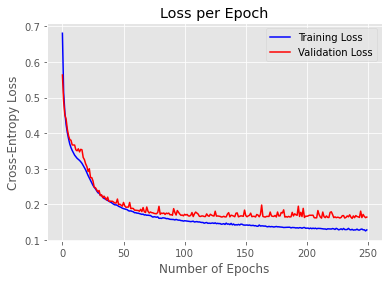

In [80]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

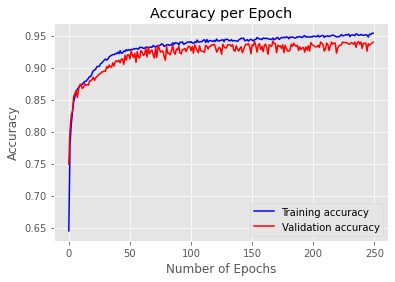

In [81]:
plt.plot(history.history['accuracy'],label = 'Training accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()

In [82]:
yy_test = pd.get_dummies(yy)
results = model.evaluate(xx_dummy, yy_test, batch_size=128)
y_hat = model.predict_classes(xx_dummy, verbose=1)
y_hat_dummy = pd.get_dummies(y_hat)
print("test loss, test acc:", results)
print(sklearn.metrics.f1_score(y_hat_dummy, yy_test,average='micro'))

 63/188 [=========>....................] - ETA: 0s 

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


188/188 [==============================] - 0s 1ms/step
test loss, test acc: [0.16914162039756775, 0.9375]
0.9375


In [83]:
from sklearn import svm
from sklearn.model_selection import train_test_split

#feat = X.drop(columns=['satisfaction'])
#feat = pd.get_dummies(feat)
#scale = StandardScaler()
#feat = pd.DataFrame(scale.fit_transform(feat))

svm_y = np.empty((len(features),1))

for i in range(len(features)):
    if features.iloc[i] == 1:
        svm_y[i] = 1
    else:
        svm_y[i] = -1

svm_y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x_wd,svm_y, test_size = 0.2, shuffle=True)


clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9404166666666667
0.9375


In [84]:
svm_y_test = np.empty((len(yy),1))

for i in range(len(yy)):
    if yy.iloc[i] == 1:
        svm_y_test[i] = 1
    else:
        svm_y_test[i] = -1

In [85]:
y_pred = clf.predict(xx_dummy)
print(clf.score(xx_dummy, svm_y_test))
print(sklearn.metrics.f1_score(y_pred, svm_y_test,average='micro'))

0.9241666666666667
0.9241666666666667


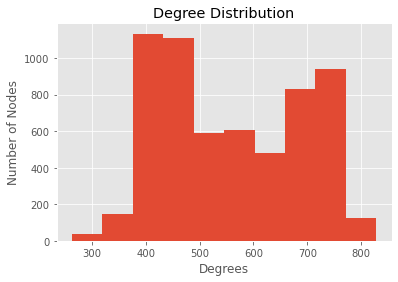

In [86]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.title('Degree Distribution')
    plt.xlabel('Degrees')
    plt.ylabel('Number of Nodes')
    plt.show()
    
plot_degree_dist(G)

In [87]:
G.number_of_edges()

1678903

In [95]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=None, random_state=0)

x_train, x_test, y_train, y_test = train_test_split(x_wd,svm_y, test_size = 0.2, shuffle=True)

clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

<ipython-input-95-df5b5aace7ed>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


1.0
0.9475


In [96]:
y_pred = clf.predict(xx_dummy)
print(clf.score(xx_dummy, svm_y_test))
print(sklearn.metrics.f1_score(y_pred, svm_y_test))

0.9458333333333333
0.9374879784573956


In [97]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(xx_dummy)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
print(clf.score(xx_dummy, svm_y_test))
print(sklearn.metrics.f1_score(y_pred, svm_y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9391666666666667
0.9225
0.9298333333333333
0.919178345171818


In [98]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(xx_dummy)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
print(clf.score(xx_dummy, svm_y_test))
print(sklearn.metrics.f1_score(y_pred, svm_y_test))

0.8752083333333334
0.8591666666666666
0.8641666666666666
0.8422682407586607


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [99]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred = clf.predict(xx_dummy)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
print(clf.score(xx_dummy, svm_y_test))
print(sklearn.metrics.f1_score(y_pred, svm_y_test))

0.8802083333333334
0.8691666666666666
0.8705
0.8486854917234664


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
